# Коэффициент Пирсона как измеритель линейной зависимости

Цель данной работы является практическое применение расчета коэффициента Пирсона к статистическим наблюдениям, имеющим линейную и нелинейную зависимости.

In [152]:
import numpy as np
import math

# Plotter:---------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
#--------------(plotter)-------------------------------------------


# Function value generator:----------------------------------------
# see docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
def make_array (Qps,Amp=1,Trend=0.5) :
    
    array = np.random.rand(Qps,1).flatten()
    array = array - 0.5
    
    array = array + Trend
    array = array * Amp
    
    #print ("  --> Requested array: {}".format(array))
    return np.array(array)

#-------------(Function value generator)---------------------------


# Linear function:-------------------------------------------------
def make_linear_function (k=1,x=0,b=0) :
    return k*x+b

def make_linear_array (k=1,x=np.array(0),b=0):
    y = list();
    for element in np.nditer(x):
        y.append(make_linear_function(k,element,b))
    return np.array(y);
#--------------(Linear function)-----------------------------------


# Statistics:------------------------------------------------------
# see article: https://kpfu.ru/portal/docs/F_2064674290/NPS_19.Pirson.Menshov.pdf
# https://www.codecamp.ru/blog/pearson-correlation-coefficient/
def pearson_coefficient (x,y) :
    x_y = np.stack((x, y), axis=0)
    cov_matrix=np.cov(x_y);
    cov_x_y = cov_matrix[0][1]
    x_variance = np.var(x) ** 0.5
    y_variance = np.var(y) ** 0.5
    pearson_coef = cov_x_y/(x_variance*y_variance)
    return pearson_coef

        
    


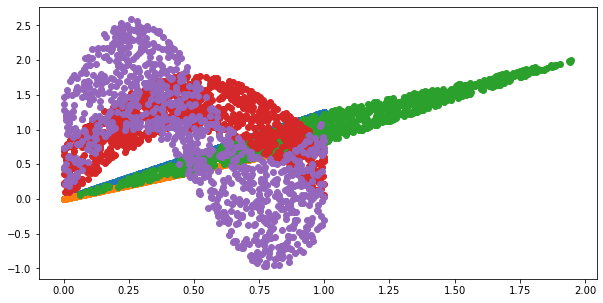

In [153]:
Qps = 1000
K1 = 1.25
K2 = 0.8
B = 0.0

x1 = make_array(Qps=Qps);
x2 = make_array(Qps=Qps);
f1 = make_linear_array(k=K1,x=x1,b=B)
f2 = make_linear_array(k=K2,x=x2,b=B)

x_linear = x1+x2
linear = f1+f2
x_nonlin = x1
nonlin = np.sin(0.8*math.pi*f1)+f2
x_nonlin2 = x1
nonlin2 = np.sin(1.5*math.pi*f1)+2*f2

plt.scatter(x1,f1)
plt.scatter(x2,f2)
plt.scatter(x_linear,linear)
plt.scatter(x_nonlin,nonlin)
plt.scatter(x_nonlin2,nonlin2)

# Коэффициент Пирсона

Применим расчет коэффициента Пирсона для множества точек <b>linear</b>, <b>nonlin</b> и <b>nonlin2</b>

Pearson for linear dependency: 0.9773533029491128


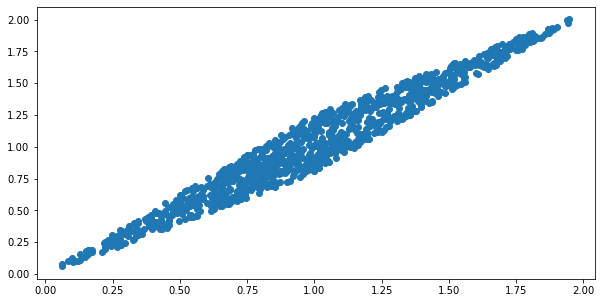

In [154]:
pearson_coef_linear = pearson_coefficient(x_linear,linear)
print ("Pearson for linear dependency: {}".format(pearson_coef_linear))
plt.scatter(x_linear,linear)

Pearson for nonlin dependency: -0.043209602505441876


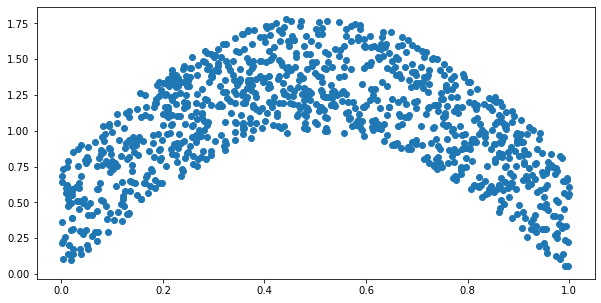

In [155]:
pearson_coef_nonlin = pearson_coefficient(x_nonlin,nonlin)
print ("Pearson for nonlin dependency: {}".format(pearson_coef_nonlin))
plt.scatter(x_nonlin,nonlin)

Pearson for nonlin2 dependency: -0.7035182625281691


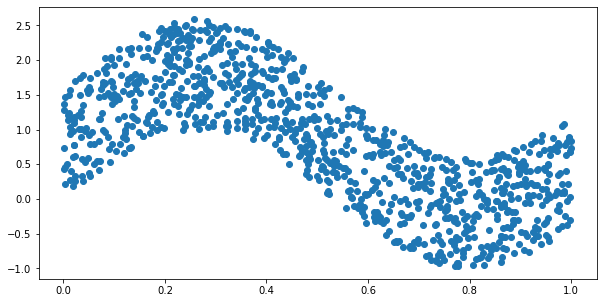

In [156]:
pearson_coef_nonlin2 = pearson_coefficient(x_nonlin2,nonlin2)
print ("Pearson for nonlin2 dependency: {}".format(pearson_coef_nonlin2))
plt.scatter(x_nonlin2,nonlin2)

<b>Вывод</b>: Для явно линейных зависимостей коэффициент Пирсона может показывать результат по наличию линейной связи. Однако из двух
других примеров видно, что при нелинейной связи коэффициент может работать некорректно. Выше показано, что на полупериод синусоиды коэффициент близок к нулю, что удовлетворительно, потому что говорит о нелинейной регресии, а вот при полном периоде синусоиды коэффициент показывает обратную линейную зависимость, хотя зависимость по-прежнему нелинейная, просто теперь уже более сложная. Последний третий пример как раз показывает, что коэффициент Пирсона не является универсальной меркой для анализа связи, а лишь для ограниченного набора данных с очень слабо выраженной линейной или нелинейной зависимотями.

# Коэффициент Фишера

Для ранее созданных массивов данных произведем расчет коэффициента Фишера

In [157]:

# Pearson coefficient from regression:------------------------
def determination_coef (x=np.array(0),y=np.array(0)) :
    pearson_coef = pearson_coefficient(x,y)
    pearson_coef = pearson_coef ** 2
    print ("Determination coefficient = {}".format(pearson_coef))
    return pearson_coef

#--------------(pearson coefficient from regression)----------


# Fisher criteria calculator:---------------------------------
def fisher_criteria_calculator (x=np.array(0),y=np.array(0)):
    det_coef = determination_coef(x,y)
    n = x.size
    fisher = (det_coef * (n - 2)) / (1 - det_coef)
    print ("Array size = {} Determination = {}, Fisher = {}".format(n,det_coef,fisher));
    return fisher    
#--------------(Fisher criteria calculator)-------------------


In [165]:
lin_fisher = fisher_criteria_calculator(x_linear,linear)
print ("Fisher criteria for linear dependency: {}".format(lin_fisher));

Determination coefficient = 0.9552194787855403
Array size = 1000 Determination = 0.9552194787855403, Fisher = 21288.4757473556
Fisher criteria for linear dependency: 21288.4757473556


In [159]:
nonlin_fisher = fisher_criteria_calculator(x_nonlin,nonlin)
print ("Fisher criteria for non-linear dependency: {}".format(nonlin_fisher));

Determination coefficient = 0.001867069748678289
Array size = 1000 Determination = 0.001867069748678289, Fisher = 1.8668210943724297
Fisher criteria for non-linear dependency: 1.8668210943724297


In [160]:
nonlin_fisher2 = fisher_criteria_calculator(x_nonlin2,nonlin2)
print ("Fisher criteria for non-linear #2 dependency: {}".format(nonlin_fisher2));

Determination coefficient = 0.4949379457106538
Array size = 1000 Determination = 0.4949379457106538, Fisher = 977.9948139526106
Fisher criteria for non-linear #2 dependency: 977.9948139526106


<b>Вывод.</b> Критерий Фишера демонстрирует ту же ошибку в оценках, что и коэффициент Пирсона для сложных нелинейных зависимостей.

# Оценка на основе суммарной ошибки от линейной регрессии

In [166]:

# Linear regression:------------------------------------------
def linear_regression (x=np.array(0),y=np.array(0)) :
    K = (np.mean(y * x) - np.mean(y) * np.mean(x)) / (np.mean(x**2) - np.mean(x) ** 2)
    B = np.mean(y) - K * np.mean(x)
    print ("Yi = {}  +  Xi * {}".format(B,K));
    return K,B
#-------------(linear regression)-----------------------------


# Calculating error:--------------------------------------
def calculate_error (Y=np.array(0),y=np.array(0)) :
    assert (Y.size==y.size)
    assert (Y.size>2)
    return np.sqrt(np.sum((y - Y)**2) / (Y.size - 2))

def calculate_normalized_error (y_predict=np.array(0),y=np.array(0)) :
    error = calculate_error(y_predict,y)
    normalized_error = error/np.std(y)
    return normalized_error
#------------(calculating error)--------------------------


Yi = 0.0015306649430499863  +  Xi * 1.0231698414114072
Normalized error =0.21629510419042108 , Pearson = 0.9773533029491128


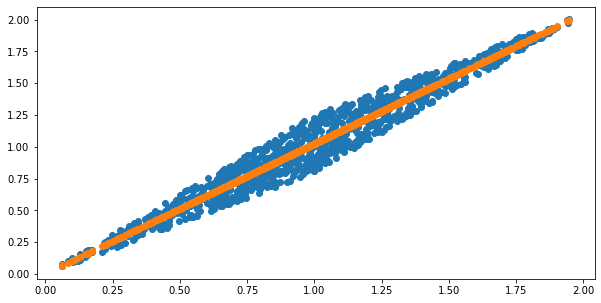

In [162]:
K,B = linear_regression(x_linear,linear);
y_linear_predict = make_linear_array(K,x_linear,B);
normalized_error = calculate_normalized_error(y_linear_predict,linear);
pearson_coef = pearson_coefficient(x_linear,linear);

print ("Normalized error ={} , Pearson = {}".format(normalized_error,pearson_coef))
plt.scatter(x_linear,linear)
plt.scatter(x_linear,y_linear_predict)

Yi = 1.0684931770524169  +  Xi * -0.056302166398236916
Normalized error =1.0000684658544845 , Pearson = -0.043209602505441876


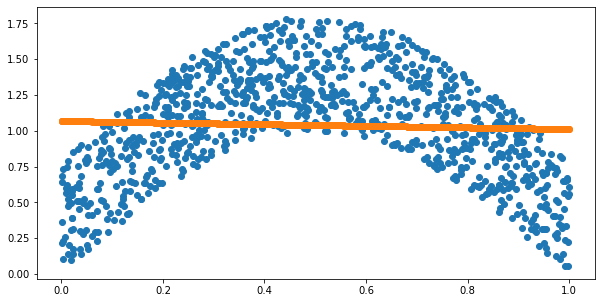

In [163]:
K,B = linear_regression(x_nonlin,nonlin);
y_nonlin_predict = make_linear_array(K,x_nonlin,B);
normalized_error = calculate_normalized_error(y_nonlin_predict,nonlin);
pearson_coef = pearson_coefficient(x_nonlin,nonlin);

print ("Normalized error ={} , Pearson = {}".format(normalized_error,pearson_coef))
plt.scatter(x_nonlin,nonlin)
plt.scatter(x_nonlin,y_nonlin_predict)

Yi = 1.9122972087787635  +  Xi * -2.146145732931754
Normalized error =0.7120853645284198 , Pearson = -0.7035182625281691


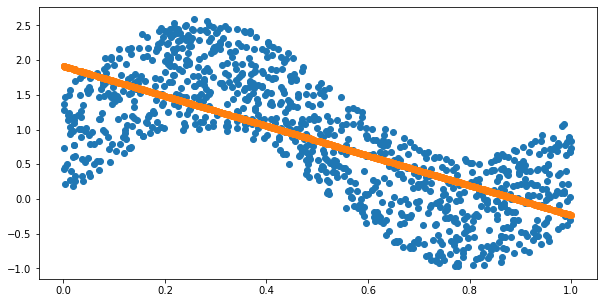

In [164]:
K,B = linear_regression(x_nonlin2,nonlin2);
y_nonlin2_predict = make_linear_array(K,x_nonlin2,B);
normalized_error = calculate_normalized_error(y_nonlin2_predict,nonlin2);
pearson_coef = pearson_coefficient(x_nonlin2,nonlin2);

print ("Normalized error ={} , Pearson = {}".format(normalized_error,pearson_coef))
plt.scatter(x_nonlin2,nonlin2)
plt.scatter(x_nonlin2,y_nonlin2_predict)

<b>Вывод.</b> Все оценки для парной линейной регрессии нужно начинать рассчитывать с усредненной ошибки апроксимации точек линейной функцией. В примерах выше мы применили накопленную ошибку, нормированную на среднеквадратическое отклонение. На рассматриваемых примерах мы показали, что когда ошибка близка к нулю, то можно смотреть на коффициент Пирсона и давать оценки по наличию прямой или обратной линейной связи. Для случаев, когда ошибка близка к 1 или превышает его, коэффициент Пирсона теряет смысл, потому что линейная функция не проходит в ближайшей окрестности большинства точек, и коэффициент при этом не равен нулю, а это означает, что в зависимости от знака коэффициента корреляционная связь может быть как ложно прямой, так и ложно обратной.